# Vibration-Based Fault Detection in Drone Using Artificial Intelligence
Drones are widely used in various industries, but structural failures, especially in drone arms, can lead to instability and crashes. This project focuses on detecting faults in drone arms using vibration-based analysis and machine learning.

We use Machine Learning approches to predict the safety status of a drone based on vibration sensor readings. A threshold-based classification is then applied to categorize the drone as Safe, Partially Safe, or Not Safe.

Key Objectives:

*   Train a regression model using vibration sensor data.
*   Predict drone safety levels based on vibration readings.
*   Use threshold-based classification for fault detection.


This approach enables early detection of potential failures, reducing crash risks and improving drone reliability

# Importing Libraries

In [ ]:
import pandas as pd # Used for data manipulation and loading datasets (Excel, CSV)
import matplotlib.pyplot as plt # A plotting library for visualizing data (e.g., histograms, scatter plots).
import seaborn as sns # Built on matplotlib, used for advanced data visualization with better aesthetics.
from sklearn.model_selection import train_test_split # Splits the dataset into training and testing sets.
from sklearn.linear_model import LinearRegression # Implements Linear Regression for predictive
from sklearn.ensemble import RandomForestRegressor # Implements Random Forest Regression for predictive
from sklearn.metrics import mean_squared_error  # Measures prediction error (how far predictions are from actual values).
from sklearn.metrics import r2_score # Evaluates model performance (how well it explains variability in data).

# Load Dataset

In [ ]:
file_path = "/content/NeuroFuzzy_1000_Dataset.xlsx"
training_data = pd.read_excel(file_path, sheet_name="Training")
testing_data = pd.read_excel(file_path, sheet_name="Testing")

# Exploratory Data Analysis

### Checking the first and last 5 rows of data

In [ ]:
training_data.head()

,Input 1,Input 2,Input 3,Input 4,Output
0,0.30,0.25,0.75,0.50,0.8
1,0.15,0.24,0.30,0.40,0.2
2,0.70,0.70,0.80,0.85,0.8
3,0.60,0.50,0.55,0.45,0.2
4,0.35,0.20,0.70,0.80,0.8


In [ ]:
testing_data.head()

,Input 1,Input 2,Input 3,Input 4,Output
0,0.117037,0.146515,0.503840,0.430278,0.2
1,0.814682,0.631141,0.612810,0.693753,0.8
2,0.324855,0.859320,0.819422,0.945213,0.8
3,0.246228,0.974222,0.531889,0.784233,0.8
4,0.342713,0.570838,0.202075,0.705572,0.5


In [ ]:
training_data.tail()

,Input 1,Input 2,Input 3,Input 4,Output
795,0.877799,0.021556,0.933502,0.450394,0.8
796,0.582433,0.559841,0.668464,0.205672,0.2
797,0.070684,0.300819,0.206776,0.899651,0.8
798,0.922745,0.939410,0.653851,0.762586,0.8
799,0.800372,0.980904,0.072052,0.882486,0.8


In [ ]:
testing_data.tail()

,Input 1,Input 2,Input 3,Input 4,Output
95,0.576053,0.850357,0.908102,0.992359,0.8
96,0.810628,0.911647,0.552175,0.802262,0.8
97,0.403843,0.639276,0.032940,0.424227,0.2
98,0.988439,0.255370,0.053863,0.728864,0.8
99,0.089999,0.088666,0.805063,0.498354,0.8


# Statistical Analysis

In [ ]:
training_data.describe()

,Vibration_Sensor_A,Vibration_Sensor_B,Vibration_Sensor_C,Vibration_Sensor_D,Safety_Score
count,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.505643,0.517003,0.501960,0.505170,0.645500
std,0.292595,0.280698,0.274645,0.279527,0.238224
min,0.000000,0.000000,0.000000,0.000000,0.200000
25%,0.235720,0.284208,0.267388,0.246533,0.500000
50%,0.524689,0.526188,0.500000,0.514119,0.800000
75%,0.755030,0.754552,0.725858,0.741103,0.800000
max,0.999900,0.999329,0.999100,0.997560,0.800000


In [ ]:
training_data.isna().sum()

,0
Vibration_Sensor_A,0
Vibration_Sensor_B,0
Vibration_Sensor_C,0
Vibration_Sensor_D,0
Safety_Score,0


# Data Manipulation

# Renaming column names for clarity

In [ ]:
training_data.rename(columns={
    "Input 1": "Vibration_Sensor_A",
    "Input 2": "Vibration_Sensor_B",
    "Input 3": "Vibration_Sensor_C",
    "Input 4": "Vibration_Sensor_D",
    "Output": "Safety_Score"
}, inplace=True)

testing_data.rename(columns={
    "Input 1": "Vibration_Sensor_A",
    "Input 2": "Vibration_Sensor_B",
    "Input 3": "Vibration_Sensor_C",
    "Input 4": "Vibration_Sensor_D",
    "Output": "Safety_Score"
}, inplace=True)

# Data Visualization

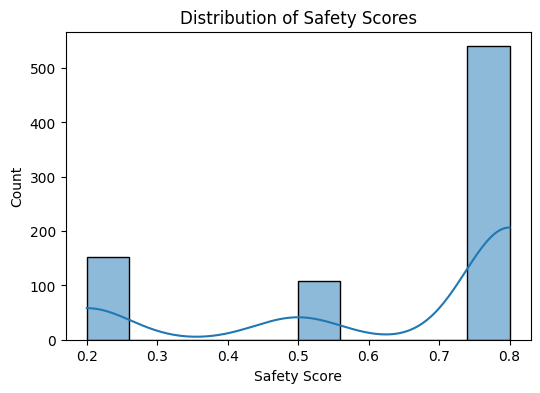

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(training_data["Safety_Score"], bins=10, kde=True)
plt.xlabel("Safety Score")
plt.ylabel("Count")
plt.title("Distribution of Safety Scores")
plt.show()

The histogram shows the distribution of safety scores, helping us understand how data is spread.

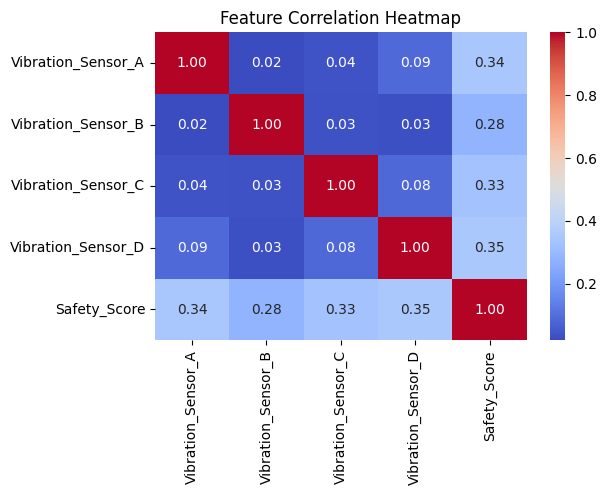

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(training_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

The heatmap highlights correlations between different vibration sensor readings.
If some sensors are highly correlated, it may indicate redundancy in features, affecting model performance.

# Data Preprocessing
Preparing data for machine learning process. We split the data into Training set and Testing set.

X_train, ytrain -> data used to train the model


X_test, y_test - > data used to test the model

In [ ]:
X_train = training_data.drop(columns=["Safety_Score"])
y_train = training_data["Safety_Score"]
X_test = testing_data.drop(columns=["Safety_Score"])
y_test = testing_data["Safety_Score"]

# Creating a Machine Learning Model

## Initializing machine learning model

In [ ]:
model = LinearRegression()

## Training the model

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

## Making Predictions

In [ ]:
y_pred = model.predict(X_test)

## Function to classify drone safety based on threshold values

In [ ]:
def classify_safety(output_value):
  if output_value < 0.4:
    return "Safe"
  elif 0.4 <= output_value < 0.65:
    return "Partially Safe"
  else:
    return "Not Safe"

## Apply classification using threshold

In [ ]:
testing_data["Predicted_Safety"] = [classify_safety(y) for y in y_pred]

# Model Evaluation

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 0.0416
R-squared Score: 0.4126


## As we see the R-squared Score is very low the model accuracy is is only 41% for Linear Regression. Now we will try using other model for better accuracy.

### We will now use the Random Forest Regressor model.

## Initialize the model

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

## Train the model

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Making Predictions

In [ ]:
rf_pred = rf_model.predict(X_test)

In [ ]:
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred) # R squre score of training dataset

print(f"Random Forest - MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")

Random Forest - MSE: 0.0020, R²: 0.9714


### As we are getting good scores lets test the model to see if it generalize the data wee. That is to check if the data overfits or underfits

In [ ]:
rf_test_pred = rf_model.predict(X_test)
mse_rf_test = mean_squared_error(y_test, rf_test_pred)
r2_rf_test = r2_score(y_test, rf_test_pred)
print(f"Random Forest - Testing MSE: {mse_rf_test:.4f}, R²: {r2_rf_test:.4f}")

Random Forest - Testing MSE: 0.0020, R²: 0.9714


In [ ]:
# Check if the model overfits or underfits
if r2_rf - r2_rf_test > 0.1:
    print("Warning: Model may be overfitting. Consider reducing max_depth or increasing dataset size.")
elif r2_rf < 0.7 and r2_rf_test < 0.7:
    print("Warning: Model may be underfitting. Consider increasing the complexity or adding features.")
else:
    print("Model generalizes well!")


Model generalizes well!


# Exporting model for Deployment

In [ ]:
import joblib
joblib.dump(rf_model, "random_forest_model.pkl")

['random_forest_model.pkl']